In [1]:
import os
os.chdir('/workspaces/work_utils2')

In [2]:
import presentation
import pandas as pd
import random_dataframe as rd
import query_tools as qt

In [3]:
ppt = presentation.PowerPointPresentation(template_filepath='presentation/assets/Blank.pptx')

# Create Title

In [4]:
slide = ppt.add_slide('Title Only')
slide.set_title(title='Title', subtitle='Subtitle')

# Load Mock-up Data

In [5]:
import json
with open('/workspaces/work_utils2/notebooks/creating_random_data/example_03.json', 'r') as f:
    specs = json.load(f)
df = rd.create_dataframe(specs, n_rows=1000, random_seed=42)
df.sample(5)

,id,name,open_date,open_week,open_month,customer_id,score,active,value,category,product_category,quantity,price,is_discounted
312,1313,AjiGFVfO6J67bCdaszy,2024-05-14,2024-03-01,2024-03-31,348,80.772624,True,74.768991,Low,Electronics,2,40.020129,False
75,1076,None,2024-12-18,2024-02-09,2024-08-31,624,74.013916,True,120.817690,Medium,Clothing,2,31.301804,False
2,1003,Gl5v8RyWA6PB7po99U9YR2Z4c,2024-09-14,2024-07-26,2024-06-30,56,74.505334,False,122.809963,Low,Clothing,3,47.137104,False
444,1445,None,2024-11-25,2024-01-26,2024-07-31,813,91.764234,False,118.048192,Medium,Electronics,3,10.000000,False
828,1829,joPC4w6q7iXJipJVYG2,2024-10-13,2024-12-13,2024-01-31,591,65.343321,True,116.235681,Low,Electronics,3,31.272944,False


In [6]:
agg_config = {
    "type": "aggregation",
    "spec": {
        "groupby": ["product_category"],
        "aggregations": [
            {"column": "customer_id", "function": "nunique", "name": "Customer Count"},
            {"column": "price", "function": "mean", "name": "Avg Price"},
            {"column": "quantity", "function": "sum", "name": "Total Quantity"},
            {"column": "is_discounted", "function": "mean", "name": "Discount Rate"},
        ]
    }
}
agg_df = qt.aggregations.process_aggregation(df, agg_config)

In [ ]:
slide = ppt.add_slide('Title Only')
slide.set_title(title='Data', subtitle='Aggregation 1')
slide.add_table(data=agg_df, left=0.5, top=1.5, width=8, height=3)

# Save Presentation

In [11]:
ppt.save('test.pptx')

In [9]:
slide = ppt.add_slide('Title Only')
slide.set_title(title='Data', subtitle='Aggregation 1')
slide = ppt.add_slide('Title Only')
slide.set_title(title='Data', subtitle='Aggregation 1')
slide = ppt.add_slide('Title Only')
slide.set_title(title='Data', subtitle='Aggregation 1')

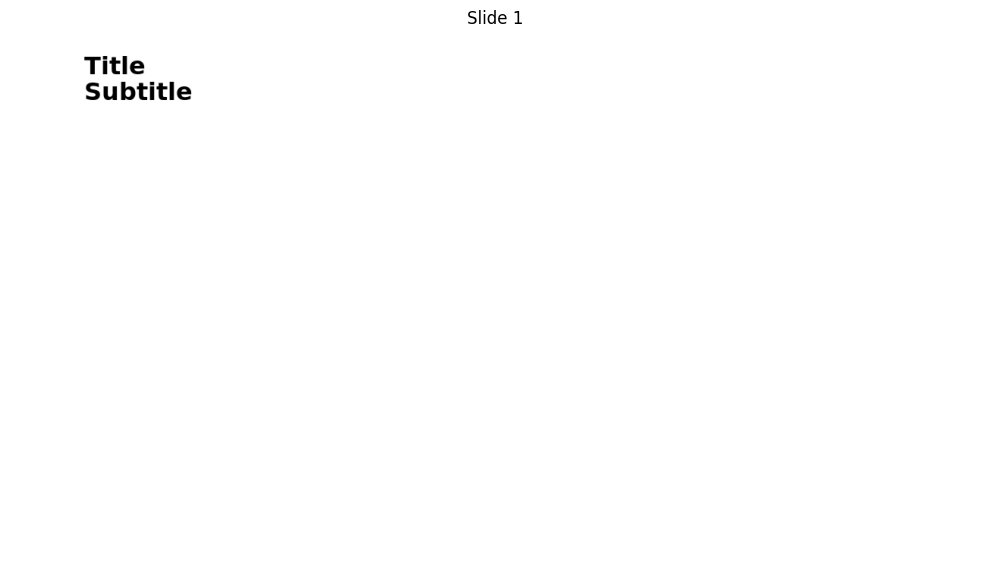

In [13]:
from presentation.pptx_preview import preview_presentation
# Preview an existing presentation
preview_presentation(ppt, slide_numbers=1)